# Particle classification
The identified particles can be classified with respect to many properties. This document performs some of these classifications. The following classifications have been prepared:

No. | Class | Type | Description
--- | ----- | ---- | -----------
0 | Chemical composition | U-particles | Particles with a significant uranium intensity
1 | Chemical composition | Non-U particles | Particles containing no uranium
2 | Chemical composition | No data | Particles which have not been measured by EDX

In [4]:
# Import modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [5]:
# directory
try:
    directory
except NameError:
    directory = "F:\\PA_UC\\"
    print("Directory not specified, set to "+directory)

# stub
try:
    stub
except NameError:
    stub = 1
    print("Stub not specified, set to "+str(stub))

# data
try:
    data
except NameError:
    print("No data available, running ImportData:")
    %run ./ImportData.ipynb
    print("-----")

#### Uranium containing particles
Use the measured EDX weight fractions to classify particles as uranium containing or not. The following values are assigned to the column *class*:
- 0: Not measured by EDX
- 1: Uranium particle
- 2: Non-uranium particle

In [6]:
def ClassifyUranium(threshold=5):
    cls = np.zeros(len(data))
    clsN = np.zeros(3)
    
    for i in range(len(data)):
        if data.iloc[i]["MinCnts"]==0:
            cls[i] = 0
            clsN[0] += 1
        elif data.iloc[i]["UM"]>threshold:
            cls[i] = 1
            clsN[1] += 1
        else:
            cls[i] = 2
            clsN[2] += 1
            
    data["classification"] = cls;
    
    print("0: "+str(clsN[0])+" particles with no EDX data")
    print("1: "+str(clsN[1])+" uranium particles")
    print("2: "+str(clsN[2])+" non-uranium particles")
        
    return cls;

0: 509.0 particles with no EDX data
1: 320.0 uranium particles
2: 0.0 non-uranium particles


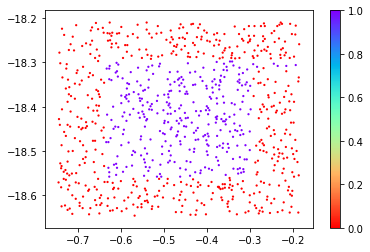

In [26]:
ClassifyUranium()

plt.scatter(
    x = data["X"], 
    y = data["Y"], 
    c = data["classification"],
    s = 5,
    alpha = 1,
    lw = 0,
    cmap = "rainbow_r")
plt.colorbar()
plt.show()

#### Uranyl chloride decomposition
Classifies the particles with respect to the decomposition stage of uranyl chloride:
- 0: Uranyl chloride droplet ($d>2.8; U/Cl<4.2$)
- 1: Uranyl chloride particle ($d<2.8; U/Cl<4.2$)
- 2: Uranium oxide particle ($d<2.8; U/Cl>4.2$)
- 3: Uranium oxide agglomerate ($d>2.8; U/Cl>4.2$)
- 4: Other

In [23]:
def ClassifyUranylChloride(ClThreshold=1):
    cls = np.zeros(len(data))
    clsN = np.zeros(5)
    
    for i in range(len(data)):
        if data.iloc[i]["MinCnts"]==0:
            # Other
            cls[i] = 4
            clsN[4] += 1
        elif data.iloc[i]["d"]>2.8:
            if data.iloc[i]["ClK"]>ClThreshold:
                # UCl droplet
                cls[i] = 0
                clsN[0] += 1
            else :
                # UO agglomerate
                cls[i] = 3
                clsN[3] += 1
        else:
            if data.iloc[i]["ClK"]>ClThreshold:
                # UCl Particle
                cls[i] = 1
                clsN[1] += 1
            else :
                # UO particle
                cls[i] = 2
                clsN[2] += 1
            
    data["classification"] = cls;
    
    print("0: "+str(clsN[0])+" particles with no EDX data")
    print("1: "+str(clsN[1])+" uranyl chloride droplets")
    print("2: "+str(clsN[2])+" uranyl chloride particles")
    print("3: "+str(clsN[3])+" uranium oxide particles")
    print("4: "+str(clsN[4])+" uranium oxide agglomerates")
        
    return cls;

In [25]:
if False:
    ClassifyUranylChloride()

    plt.scatter(
        x = data["X"], 
        y = data["Y"], 
        c = data["classification"],
        s = 5,
        alpha = 1,
        lw = 0,
        cmap = "rainbow_r")
    plt.colorbar()
    plt.show()